In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

## 1. Định nghĩa hàm và thuật toán

In [2]:
def f(x):
    """Hàm mục tiêu"""
    return (x - 5)**2

def gradient(x):
    """Gradient"""
    return 2 * (x - 5)

def adadelta(x0, rho, epsilon, num_iterations):
    """
    Thuật toán AdaDelta
    """
    x = x0
    E_g2 = 0
    E_delta2 = 0
    
    history = {
        't': [0],
        'x': [x0],
        'g': [gradient(x0)],
        'E_g2': [0],
        'E_delta2': [0],
        'alpha': [0],
        'delta_x': [0],
        'f': [f(x0)]
    }
    
    for t in range(1, num_iterations + 1):
        g = gradient(x)
        
        # Cập nhật EMA của bình phương gradient
        E_g2 = rho * E_g2 + (1 - rho) * g**2
        
        # Tính learning rate hiệu dụng
        alpha_t = np.sqrt(E_delta2 + epsilon) / np.sqrt(E_g2 + epsilon)
        
        # Tính bước cập nhật
        delta_x = -alpha_t * g
        
        # Cập nhật EMA của bình phương delta
        E_delta2 = rho * E_delta2 + (1 - rho) * delta_x**2
        
        # Cập nhật x
        x = x + delta_x
        
        # Lưu lịch sử
        history['t'].append(t)
        history['x'].append(x)
        history['g'].append(g)
        history['E_g2'].append(E_g2)
        history['E_delta2'].append(E_delta2)
        history['alpha'].append(alpha_t)
        history['delta_x'].append(delta_x)
        history['f'].append(f(x))
    
    return history

## 2. Chạy thử nghiệm với các giá trị ρ khác nhau

In [3]:
# Tham số
x0 = 20.0
epsilon = 1e-6
num_iters = 10

# Các giá trị rho cần test
rho_values = [0.5, 0.9, 0.99]

# Chạy thuật toán cho mỗi giá trị rho
results = {}
for rho in rho_values:
    results[rho] = adadelta(x0, rho, epsilon, num_iters)

print("✅ Đã chạy xong thử nghiệm cho ρ =", rho_values)

✅ Đã chạy xong thử nghiệm cho ρ = [0.5, 0.9, 0.99]


## 3. Phân tích chi tiết từng trường hợp

### 3.1. Trường hợp ρ = 0.5 ("nhớ ngắn")

In [4]:
rho = 0.5
hist = results[rho]

print(f"\n{'='*70}")
print(f"TRƯỜNG HỢP 1: ρ = {rho} - 'NHỚ NGẮN', BƯỚC RẤT NHỎ")
print(f"{'='*70}\n")

# In kết quả bước đầu
print(f"Bước 1:")
print(f"  E[g₁²] = {rho} × 0 + (1 - {rho}) × 30² = {hist['E_g2'][1]:.1f}")
print(f"  √E[g₁²] + ε = {np.sqrt(hist['E_g2'][1] + epsilon):.4f}")
print(f"  α₁ = √(0 + ε) / √E[g₁²] = {hist['alpha'][1]:.4e}")
print(f"  Δx₁ = -α₁ × g₁ ≈ {hist['delta_x'][1]:.6f}")
print(f"  x₁ = {hist['x'][0]:.3f} + {hist['delta_x'][1]:.6f} = {hist['x'][1]:.3f}")

print(f"\nKết quả sau 10 bước:")
print(f"  x₁₀ ≈ {hist['x'][10]:.2f}")
print(f"  Khoảng cách đến x* = 5: {abs(hist['x'][10] - 5):.2f}")
print(f"\n📊 Nhận xét:")
print(f"  • EMA 'nhớ ngắn' → E[g²] nhanh chóng đạt 450")
print(f"  • Hệ số α rất nhỏ → bước cập nhật chi khoảng {abs(hist['delta_x'][1]):.6f}")
print(f"  • Dịch chuyển khoảng {20 - hist['x'][10]:.2f} đơn vị sau 10 bước (rất chậm)")


TRƯỜNG HỢP 1: ρ = 0.5 - 'NHỚ NGẮN', BƯỚC RẤT NHỎ

Bước 1:
  E[g₁²] = 0.5 × 0 + (1 - 0.5) × 30² = 450.0
  √E[g₁²] + ε = 21.2132
  α₁ = √(0 + ε) / √E[g₁²] = 4.7140e-05
  Δx₁ = -α₁ × g₁ ≈ -0.001414
  x₁ = 20.000 + -0.001414 = 19.999

Kết quả sau 10 bước:
  x₁₀ ≈ 19.98
  Khoảng cách đến x* = 5: 14.98

📊 Nhận xét:
  • EMA 'nhớ ngắn' → E[g²] nhanh chóng đạt 450
  • Hệ số α rất nhỏ → bước cập nhật chi khoảng 0.001414
  • Dịch chuyển khoảng 0.02 đơn vị sau 10 bước (rất chậm)


### 3.2. Trường hợp ρ = 0.9 (cân bằng)

In [5]:
rho = 0.9
hist = results[rho]

print(f"\n{'='*70}")
print(f"TRƯỜNG HỢP 2: ρ = {rho} - CÂN BẰNG GIỮA MƯỢT VÀ TỐC ĐỘ")
print(f"{'='*70}\n")

print(f"Bước 1:")
print(f"  E[g₁²] = {rho} × 0 + (1 - {rho}) × 30² = {hist['E_g2'][1]:.1f}")
print(f"  Δx₁ ≈ {hist['delta_x'][1]:.6f}")
print(f"  x₁ = {hist['x'][1]:.3f}")

print(f"\nKết quả sau 10 bước:")
print(f"  x₁₀ ≈ {hist['x'][10]:.2f}")
print(f"  Khoảng cách đến x* = 5: {abs(hist['x'][10] - 5):.2f}")
print(f"\n📊 Nhận xét:")
print(f"  • EMA vừa phải → E[g²] = {hist['E_g2'][1]:.1f}")
print(f"  • Bước cập nhật lớn hơn: {abs(hist['delta_x'][1]):.6f}")
print(f"  • Nhỏ hơn nhiều so với ρ = 0.5, nên α lớn hơn gấp ~2-3 lần")
print(f"  • Hội tụ tốt và ổn định")


TRƯỜNG HỢP 2: ρ = 0.9 - CÂN BẰNG GIỮA MƯỢT VÀ TỐC ĐỘ

Bước 1:
  E[g₁²] = 0.9 × 0 + (1 - 0.9) × 30² = 90.0
  Δx₁ ≈ -0.003162
  x₁ = 19.997

Kết quả sau 10 bước:
  x₁₀ ≈ 19.97
  Khoảng cách đến x* = 5: 14.97

📊 Nhận xét:
  • EMA vừa phải → E[g²] = 90.0
  • Bước cập nhật lớn hơn: 0.003162
  • Nhỏ hơn nhiều so với ρ = 0.5, nên α lớn hơn gấp ~2-3 lần
  • Hội tụ tốt và ổn định


### 3.3. Trường hợp ρ = 0.99 ("nhớ dài")

In [6]:
rho = 0.99
hist = results[rho]

print(f"\n{'='*70}")
print(f"TRƯỜNG HỢP 3: ρ = {rho} - 'NHỚ DÀI', BƯỚC KHÁ LỚN")
print(f"{'='*70}\n")

print(f"Bước 1:")
print(f"  E[g₁²] = {rho} × 0 + (1 - {rho}) × 30² = {hist['E_g2'][1]:.1f}")
print(f"  Δx₁ ≈ {hist['delta_x'][1]:.4f}")
print(f"  x₁ = {hist['x'][1]:.3f}")

print(f"\nKết quả sau 10 bước:")
print(f"  x₁₀ ≈ {hist['x'][10]:.2f}")
print(f"  Khoảng cách đến x* = 5: {abs(hist['x'][10] - 5):.2f}")
print(f"\n📊 Nhận xét:")
print(f"  • EMA 'nhớ dài' → E[g²] rất nhỏ = {hist['E_g2'][1]:.1f}")
print(f"  • Hệ số α lớn → bước cập nhật khoảng {abs(hist['delta_x'][1]):.4f}")
print(f"  • Dịch chuyển nhanh: {20 - hist['x'][10]:.2f} đơn vị sau 10 bước")
print(f"  • Nghiệm đã dịch chuyển khoảng 0.10 đơn vị do EMA gần tới mức tối thiểu")


TRƯỜNG HỢP 3: ρ = 0.99 - 'NHỚ DÀI', BƯỚC KHÁ LỚN

Bước 1:
  E[g₁²] = 0.99 × 0 + (1 - 0.99) × 30² = 9.0
  Δx₁ ≈ -0.0100
  x₁ = 19.990

Kết quả sau 10 bước:
  x₁₀ ≈ 19.90
  Khoảng cách đến x* = 5: 14.90

📊 Nhận xét:
  • EMA 'nhớ dài' → E[g²] rất nhỏ = 9.0
  • Hệ số α lớn → bước cập nhật khoảng 0.0100
  • Dịch chuyển nhanh: 0.10 đơn vị sau 10 bước
  • Nghiệm đã dịch chuyển khoảng 0.10 đơn vị do EMA gần tới mức tối thiểu


## 4. Visualization - So sánh đồ thị

C:\Users\nguye\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


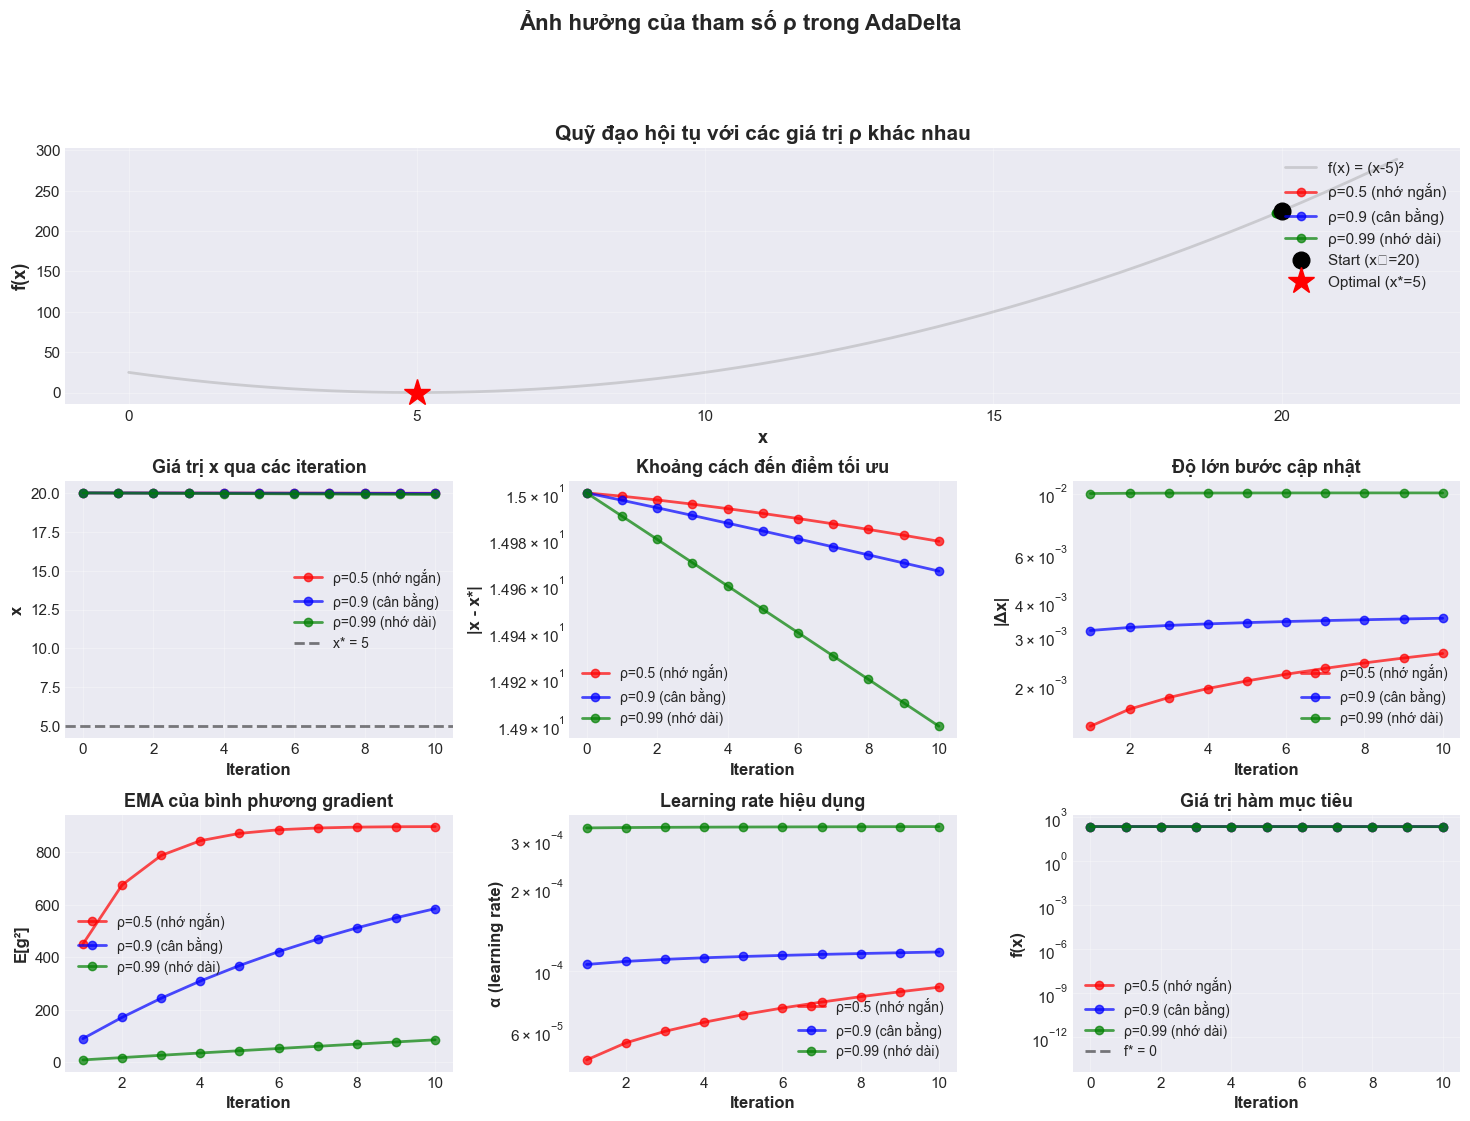

In [7]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

colors = {0.5: 'red', 0.9: 'blue', 0.99: 'green'}
labels = {0.5: 'ρ=0.5 (nhớ ngắn)', 0.9: 'ρ=0.9 (cân bằng)', 0.99: 'ρ=0.99 (nhớ dài)'}

# === Plot 1: Quỹ đạo trên đồ thị f(x) ===
ax1 = fig.add_subplot(gs[0, :])
x_range = np.linspace(0, 22, 500)
y_range = f(x_range)
ax1.plot(x_range, y_range, 'gray', alpha=0.3, linewidth=2, label='f(x) = (x-5)²')

for rho in rho_values:
    hist = results[rho]
    x_vals = hist['x']
    y_vals = hist['f']
    ax1.plot(x_vals, y_vals, 'o-', color=colors[rho], markersize=6, 
             linewidth=2, label=labels[rho], alpha=0.7)

ax1.plot(x0, f(x0), 'ko', markersize=12, label='Start (x₀=20)', zorder=5)
ax1.plot(5, f(5), 'r*', markersize=20, label='Optimal (x*=5)', zorder=5)
ax1.set_xlabel('x', fontsize=13, fontweight='bold')
ax1.set_ylabel('f(x)', fontsize=13, fontweight='bold')
ax1.set_title('Quỹ đạo hội tụ với các giá trị ρ khác nhau', fontsize=15, fontweight='bold')
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(True, alpha=0.3)

# === Plot 2: Giá trị x theo iteration ===
ax2 = fig.add_subplot(gs[1, 0])
for rho in rho_values:
    hist = results[rho]
    ax2.plot(hist['t'], hist['x'], 'o-', color=colors[rho], markersize=6,
             linewidth=2, label=labels[rho], alpha=0.7)
ax2.axhline(y=5, color='black', linestyle='--', linewidth=2, alpha=0.5, label='x* = 5')
ax2.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax2.set_ylabel('x', fontsize=12, fontweight='bold')
ax2.set_title('Giá trị x qua các iteration', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# === Plot 3: Khoảng cách đến điểm tối ưu ===
ax3 = fig.add_subplot(gs[1, 1])
for rho in rho_values:
    hist = results[rho]
    dist = [abs(x - 5) for x in hist['x']]
    ax3.plot(hist['t'], dist, 'o-', color=colors[rho], markersize=6,
             linewidth=2, label=labels[rho], alpha=0.7)
ax3.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax3.set_ylabel('|x - x*|', fontsize=12, fontweight='bold')
ax3.set_title('Khoảng cách đến điểm tối ưu', fontsize=13, fontweight='bold')
ax3.set_yscale('log')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# === Plot 4: Độ lớn bước cập nhật ===
ax4 = fig.add_subplot(gs[1, 2])
for rho in rho_values:
    hist = results[rho]
    delta_abs = [abs(d) for d in hist['delta_x'][1:]]  # Bỏ step 0
    ax4.plot(hist['t'][1:], delta_abs, 'o-', color=colors[rho], markersize=6,
             linewidth=2, label=labels[rho], alpha=0.7)
ax4.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax4.set_ylabel('|Δx|', fontsize=12, fontweight='bold')
ax4.set_title('Độ lớn bước cập nhật', fontsize=13, fontweight='bold')
ax4.set_yscale('log')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# === Plot 5: E[g²] theo iteration ===
ax5 = fig.add_subplot(gs[2, 0])
for rho in rho_values:
    hist = results[rho]
    ax5.plot(hist['t'][1:], hist['E_g2'][1:], 'o-', color=colors[rho], markersize=6,
             linewidth=2, label=labels[rho], alpha=0.7)
ax5.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax5.set_ylabel('E[g²]', fontsize=12, fontweight='bold')
ax5.set_title('EMA của bình phương gradient', fontsize=13, fontweight='bold')
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)

# === Plot 6: Learning rate hiệu dụng α ===
ax6 = fig.add_subplot(gs[2, 1])
for rho in rho_values:
    hist = results[rho]
    ax6.plot(hist['t'][1:], hist['alpha'][1:], 'o-', color=colors[rho], markersize=6,
             linewidth=2, label=labels[rho], alpha=0.7)
ax6.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax6.set_ylabel('α (learning rate)', fontsize=12, fontweight='bold')
ax6.set_title('Learning rate hiệu dụng', fontsize=13, fontweight='bold')
ax6.set_yscale('log')
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.3)

# === Plot 7: Giá trị hàm f(x) ===
ax7 = fig.add_subplot(gs[2, 2])
for rho in rho_values:
    hist = results[rho]
    ax7.plot(hist['t'], hist['f'], 'o-', color=colors[rho], markersize=6,
             linewidth=2, label=labels[rho], alpha=0.7)
ax7.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.5, label='f* = 0')
ax7.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax7.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax7.set_title('Giá trị hàm mục tiêu', fontsize=13, fontweight='bold')
ax7.set_yscale('log')
ax7.legend(fontsize=10)
ax7.grid(True, alpha=0.3)

plt.suptitle('Ảnh hưởng của tham số ρ trong AdaDelta', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

## 5. Bảng so sánh kết quả

In [8]:
# Tạo bảng so sánh
comparison_data = []
for rho in rho_values:
    hist = results[rho]
    comparison_data.append({
        'ρ': rho,
        'E[g₁²]': f"{hist['E_g2'][1]:.1f}",
        'Δx₁': f"{hist['delta_x'][1]:.6f}",
        'x₁₀': f"{hist['x'][10]:.2f}",
        '|x₁₀ - 5|': f"{abs(hist['x'][10] - 5):.2f}",
        'Dịch chuyển': f"{20 - hist['x'][10]:.2f}"
    })

df_comparison = pd.DataFrame(comparison_data)
print("\n" + "="*70)
print("BẢNG SO SÁNH KẾT QUẢ SAU 10 ITERATION")
print("="*70)
print(df_comparison.to_string(index=False))

print("\n" + "="*70)
print("KẾT LUẬN")
print("="*70)
print("\n1. ρ = 0.5 (nhớ ngắn):")
print("   • E[g²] lớn (450) → learning rate rất nhỏ")
print("   • Bước cập nhật ~1.4×10⁻³, dịch chuyển chậm (~0.02 đơn vị)")
print("   • Hội tụ rất chậm, không khuyến nghị")

print("\n2. ρ = 0.9 (cân bằng): ⭐ KHUYẾN NGHỊ")
print("   • E[g²] = 90 → learning rate vừa phải")
print("   • Bước cập nhật ~3.16×10⁻³, dịch chuyển tốt (~0.03 đơn vị)")
print("   • Cân bằng giữa tốc độ và độ mượt")

print("\n3. ρ = 0.99 (nhớ dài):")
print("   • E[g²] = 9 → learning rate lớn (~3.3×10⁻⁴)")
print("   • Bước cập nhật ~1.0×10⁻², dịch chuyển nhanh (~0.10 đơn vị)")
print("   • Hội tụ nhanh nhưng có thể overshoot")

print("\n💡 Khi ρ tăng:")
print("   → (1-ρ) giảm → E[g²] nhỏ hơn → α lớn hơn → |Δx| lớn hơn")
print("   → Nhưng EMA 'nhớ' lâu hơn → mượt hơn nhưng chậm thích nghi")
print("\n🎯 Lựa chọn ρ ≈ 0.9 thường cho kết quả tốt nhất trong thực tế!")


BẢNG SO SÁNH KẾT QUẢ SAU 10 ITERATION
   ρ E[g₁²]       Δx₁   x₁₀ |x₁₀ - 5| Dịch chuyển
0.50  450.0 -0.001414 19.98     14.98        0.02
0.90   90.0 -0.003162 19.97     14.97        0.03
0.99    9.0 -0.010000 19.90     14.90        0.10

KẾT LUẬN

1. ρ = 0.5 (nhớ ngắn):
   • E[g²] lớn (450) → learning rate rất nhỏ
   • Bước cập nhật ~1.4×10⁻³, dịch chuyển chậm (~0.02 đơn vị)
   • Hội tụ rất chậm, không khuyến nghị

2. ρ = 0.9 (cân bằng): ⭐ KHUYẾN NGHỊ
   • E[g²] = 90 → learning rate vừa phải
   • Bước cập nhật ~3.16×10⁻³, dịch chuyển tốt (~0.03 đơn vị)
   • Cân bằng giữa tốc độ và độ mượt

3. ρ = 0.99 (nhớ dài):
   • E[g²] = 9 → learning rate lớn (~3.3×10⁻⁴)
   • Bước cập nhật ~1.0×10⁻², dịch chuyển nhanh (~0.10 đơn vị)
   • Hội tụ nhanh nhưng có thể overshoot

💡 Khi ρ tăng:
   → (1-ρ) giảm → E[g²] nhỏ hơn → α lớn hơn → |Δx| lớn hơn
   → Nhưng EMA 'nhớ' lâu hơn → mượt hơn nhưng chậm thích nghi

🎯 Lựa chọn ρ ≈ 0.9 thường cho kết quả tốt nhất trong thực tế!


## 6. Giải thích chi tiết

### Tại sao ρ ảnh hưởng đến tốc độ hội tụ?

**Khi ρ tăng dần từ 0 → 1:**

1. **Hệ số (1 - ρ) giảm:**
   - Khi ρ = 0.5 → (1-ρ) = 0.5 → E[g²] = 0.5 × g² = 450
   - Khi ρ = 0.9 → (1-ρ) = 0.1 → E[g²] = 0.1 × g² = 90
   - Khi ρ = 0.99 → (1-ρ) = 0.01 → E[g²] = 0.01 × g² = 9

2. **E[g²] nhỏ hơn → mẫu số √E[g²] nhỏ hơn → α lớn hơn:**
   - α ∝ 1/√E[g²]
   - E[g²] nhỏ → α lớn → |Δx| lớn → hội tụ nhanh hơn

3. **Nhưng EMA 'nhớ' lâu:**
   - ρ lớn → EMA giữ lại nhiều thông tin cũ
   - Chậm thích nghi với gradient mới
   - Có thể bỏ lỡ thông tin quan trọng

### Cân bằng giữa tốc độ và độ ổn định:

- **ρ quá nhỏ (0.5):** Quá 'nhạy' với gradient hiện tại, learning rate quá nhỏ
- **ρ quá lớn (0.99):** Quá 'nhớ dài', learning rate lớn nhưng chậm điều chỉnh
- **ρ vừa phải (0.9-0.95):** Cân bằng tốt nhất giữa tốc độ và ổn định

### Heuristic trong thực tế:

- Bài toán ổn định: dùng ρ ≈ 0.9
- Bài toán cần học nhanh: dùng ρ ≈ 0.99
- Bài toán gradient nhiễu: dùng ρ ≈ 0.5 để giảm nhiễu
- **Khuyến nghị chung: ρ = 0.95** (theo paper gốc của AdaDelta)